In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# llama-2-70b-chat is 0.009 per 1K tokens
token_price = 0.0009 / 1000
dedicated_per_hour_price = 6.17

throughput_dedicated = 117 # tokens per second
throughput_serverless = 99 # tokens per second
serverless_network_delay = 0.5 # seconds per request
tokens_per_request = 1000

job_sizes = np.arange(1000000, 1000000000, 50000000)
job_size_labels = [f"{int(i/1000000)-1}M" for i in job_sizes]

[2.3741690408357075, 121.08262108262107, 239.79107312440647, 358.4995251661918, 477.2079772079772, 595.9164292497626, 714.6248812915479, 833.3333333333334, 952.0417853751187, 1070.7502374169042, 1189.4586894586894, 1308.1671415004748, 1426.8755935422603, 1545.5840455840455, 1664.2924976258307, 1783.0009496676164, 1901.7094017094016, 2020.4178537511873, 2139.1263057929727, 2257.834757834758]


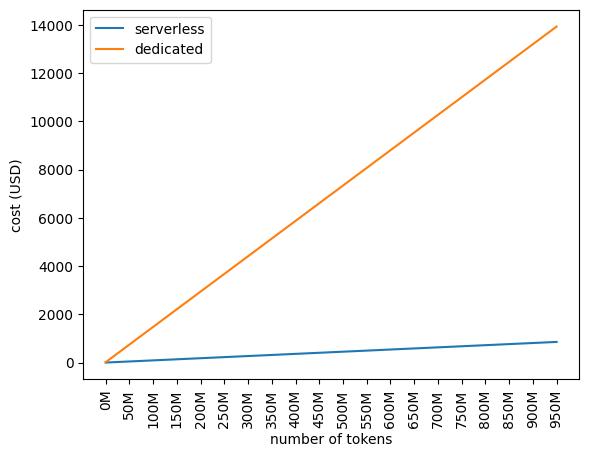

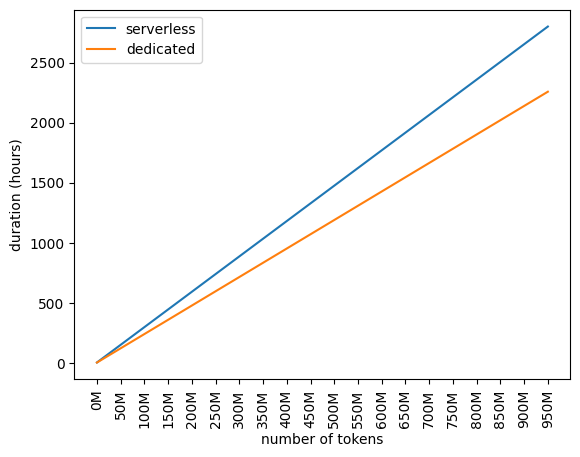

In [47]:
serverless_cost = [job_size * token_price for job_size in job_sizes]
serverless_duration = [((job_size / throughput_serverless) + (job_size / tokens_per_request * serverless_network_delay)) / 60 / 60 for job_size in job_sizes] # in hours
dedicated_duration = [(job_size / throughput_dedicated) / 60 / 60 for job_size in job_sizes] # in hours
dedicated_cost = [dedicated_per_hour_price * duration for duration in dedicated_duration]

plt.plot(serverless_cost)
plt.plot(dedicated_cost)
plt.xlabel("number of tokens")
plt.xticks(np.arange(len(job_sizes)), job_size_labels, rotation='vertical')
plt.ylabel("cost (USD)")
# plt.yscale("log")
plt.legend(["serverless", "dedicated"])
plt.show()

plt.plot(serverless_duration)
plt.plot(dedicated_duration)
plt.xlabel("number of tokens")
plt.xticks(np.arange(len(job_sizes)), job_size_labels, rotation='vertical')
plt.ylabel("duration (hours)")
# plt.yscaleI("log")
plt.legend(["serverless", "dedicated"])
plt.show()